In [1]:
import baryonification as bfc

from scipy.interpolate import splrep, splev
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def cvir_fct(mvir):
    """
    Concentrations form Dutton+Maccio (2014)
    c200 (200 times RHOC)
    Assumes PLANCK coismology
    """
    A = 1.025
    B = 0.097
    return 10.0**A*(mvir/1.0e12)**(-B)

def DeltaSigmas_from_density_profile(rbin,dens):
    
    dbin = rbin
    Sig_DMO   = []
    Sig_DMB   = []
    avSig_DMO = []
    avSig_DMB = []


    densDMO_tck = splrep(rbin,dens['DMO'])
    densDMB_tck = splrep(rbin,dens['DMB'])

    for i in range(len(dbin)):
        itgDMO   = lambda zz: splev((zz**2.0+dbin[i]**2.0)**0.5,densDMO_tck,ext=0)
        Sig_DMO += [2.0*quad(itgDMO,0,max(dbin),limit=200)[0]]
        itgDMB   = lambda zz: splev((zz**2.0+dbin[i]**2.0)**0.5,densDMB_tck,ext=0)
        Sig_DMB += [2.0*quad(itgDMB,min(dbin),max(dbin),limit=200)[0]]

    Sig_DMO = np.array(Sig_DMO)
    Sig_DMB = np.array(Sig_DMB)


    cumSigDMO_tck = splrep(dbin, Sig_DMO)
    cumSigDMB_tck = splrep(dbin, Sig_DMB)

    for i in range(len(dbin)):
        itgDMO = lambda dd: dd*splev(dd,cumSigDMO_tck)
        avSig_DMO += [quad(itgDMO,0,dbin[i])[0]*2.0/dbin[i]**2.0]
        itgDMB = lambda dd: dd*splev(dd,cumSigDMB_tck)
        avSig_DMB += [quad(itgDMB,0,dbin[i])[0]*2.0/dbin[i]**2.0]

    avSig_DMO = np.array(avSig_DMO)
    avSig_DMB = np.array(avSig_DMB)
    
    
    deltaSigmaDMO = avSig_DMO-Sig_DMO   #(Msun/h) / Mpc^2
    deltaSigmaDMB = avSig_DMB-Sig_DMB
    
    return deltaSigmaDMB, deltaSigmaDMO, deltaSigmaDMB / deltaSigmaDMO

def plot_ratio(rbin, ratio, label):
    
    plt.semilogx(rbin, ratio, label=label)
    plt.axhline(1, color='k')
    plt.xlabel('r [Mpc/h]')
    plt.ylabel(r'$\Delta \Sigma_{baryons} / \Delta \Sigma_{DM}$')
    plt.ylim([0.75,1.1])
    plt.xlim([0.05,20])

In [5]:
par = bfc.par()

par.baryon.eta_tot = 0.32
par.baryon.eta_cga = 0.6

par.files.transfct = '/Users/fardila/Documents/GitHub/baryonification/baryonification/files/CDM_PLANCK_tk.dat'

In [6]:
N_rbin = 100
rbin = np.logspace(np.log10(0.001),np.log10(50),N_rbin,base=10)

#halo params
Mv=1e14
cv=cvir_fct(Mv)

#baryon params
Mc   = 6.6e13
mu   = 0.21
thej = 4.0

In [7]:
#2h term
vc_r, vc_m, vc_bias, vc_corr = bfc.cosmo(par)
bias_tck = splrep(vc_m, vc_bias, s=0)
corr_tck = splrep(vc_r, vc_corr, s=0)

cosmo_bias = splev(Mv,bias_tck)
cosmo_corr = splev(rbin,corr_tck)

Normalizing power-spectrum done!


# $\mu$

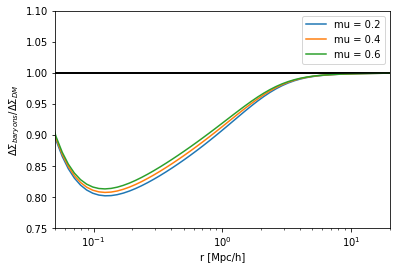

In [152]:
#baryon params
Mc   = 6.6e13
# mu   = 0.21
thej = 4.0

mus = [0.2,0.4,0.6]
param_name = 'mu'
labels = ['0.2','0.4','0.6']

for mu, label in zip(mus,labels):
    frac, dens, mass = bfc.profiles(rbin,Mv,cv,Mc,mu,thej,cosmo_corr,cosmo_bias,par)
    deltaSigmaDMB, deltaSigmaDMO, ratio = DeltaSigmas_from_density_profile(rbin,dens)
    plot_ratio(rbin, ratio, '{0} = {1}'.format(param_name, label))
    

plt.legend()    
plt.show()
    

# $M_c$ 

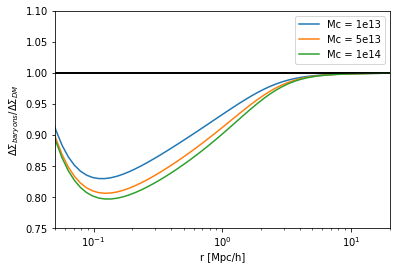

In [11]:
#baryon params
# Mc   = 6.6e13
mu   = 0.21
thej = 4.0

Mcs = [1e13,5e13,1e14]
param_name = 'Mc'
labels = ['1e13','5e13','1e14']

for Mc, label in zip(Mcs,labels):
    frac, dens, mass = bfc.profiles(rbin,Mv,cv,Mc,mu,thej,cosmo_corr,cosmo_bias,par)
    deltaSigmaDMB, deltaSigmaDMO, ratio = DeltaSigmas_from_density_profile(rbin,dens)
    plot_ratio(rbin, ratio, '{0} = {1}'.format(param_name, label))
    

plt.legend()    
plt.show()

# $\theta_{ej}$

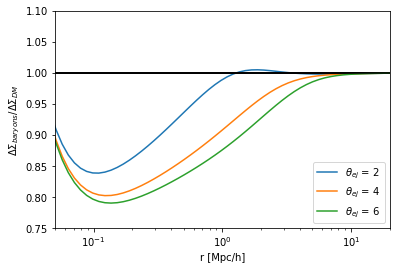

In [12]:
#baryon params
Mc   = 6.6e13
mu   = 0.21
# thej = 4.0

thejs = [2,4,6]
param_name = r'$\theta_{ej}$'
labels = ['2','4','6']

for thej, label in zip(thejs,labels):
    frac, dens, mass = bfc.profiles(rbin,Mv,cv,Mc,mu,thej,cosmo_corr,cosmo_bias,par)
    deltaSigmaDMB, deltaSigmaDMO, ratio = DeltaSigmas_from_density_profile(rbin,dens)
    plot_ratio(rbin, ratio, '{0} = {1}'.format(param_name, label))
    

plt.legend()    
plt.show()

# $\eta_{tot}$

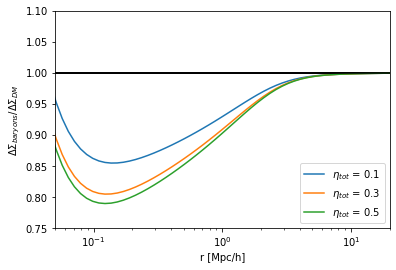

In [15]:
#baryon params
Mc   = 6.6e13
mu   = 0.21
thej = 4.0
par.baryon.eta_tot = 0.32
par.baryon.eta_cga = 0.6

eta_tots = [0.1,0.3,0.5]
param_name = r'$\eta_{tot}$'
labels = ['0.1','0.3','0.5']

for eta_tot, label in zip(eta_tots,labels):
    par.baryon.eta_tot = eta_tot
    frac, dens, mass = bfc.profiles(rbin,Mv,cv,Mc,mu,thej,cosmo_corr,cosmo_bias,par)
    deltaSigmaDMB, deltaSigmaDMO, ratio = DeltaSigmas_from_density_profile(rbin,dens)
    plot_ratio(rbin, ratio, '{0} = {1}'.format(param_name, label))
    

plt.legend()    
plt.show()

# $\eta_{cga}$

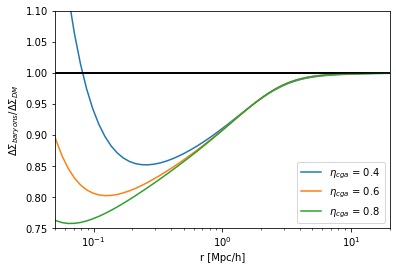

In [16]:
#baryon params
Mc   = 6.6e13
mu   = 0.21
thej = 4.0
par.baryon.eta_tot = 0.32
par.baryon.eta_cga = 0.6

eta_cgas = [0.4,0.6,0.8]
param_name = r'$\eta_{cga}$'
labels = ['0.4','0.6','0.8']

for eta_cga, label in zip(eta_cgas,labels):
    par.baryon.eta_cga = eta_cga
    frac, dens, mass = bfc.profiles(rbin,Mv,cv,Mc,mu,thej,cosmo_corr,cosmo_bias,par)
    deltaSigmaDMB, deltaSigmaDMO, ratio = DeltaSigmas_from_density_profile(rbin,dens)
    plot_ratio(rbin, ratio, '{0} = {1}'.format(param_name, label))
    

plt.legend()    
plt.show()